In [29]:
# First code block is the import libraries  
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [30]:
def data_splitting(df: pd.DataFrame):
    df_new = df
        
    # handling the seat of passengers 
    df_new[['Cabin_deck','Cabin_num','Cabin_side']] = df['Cabin'].str.split('/',expand=True)

    # handling spending of each passengers : RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
    df_new[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(0)
    df_new.loc[:, ['Total_spending']] = df_new['RoomService'] + df_new['FoodCourt'] + df_new['ShoppingMall'] + df_new['Spa'] + df_new['VRDeck']

    df_processedData = df_new[
        [   'PassengerId', 'HomePlanet', 'CryoSleep',
            'Cabin_deck', 'Cabin_num', 'Cabin_side', 
            'Destination', 'Age',
            'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_spending',
            'Name',
            'Transported'
        ]
    ]
    
    return df_processedData




In [31]:
# fill null record
def fillNA(df):
    df['CryoSleep'] = df['CryoSleep'].fillna(value=False)
    df['Age'] = df['Age'].fillna(df['Age'].mean())


In [32]:
dataPath = '../../spaceship-titanic_rawData/spaceship_train.csv'
df_public = data_splitting(pd.read_csv(dataPath))
pd.reset_option('^display.', silent=True)
df_public

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_num,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,Name,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,Juanna Vines,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,Altark Susent,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,Solam Susent,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,8536.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1873.0,Fayey Connon,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,4637.0,Celeon Hontichre,False


In [56]:
# Check number of null values
df_public.isnull().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Cabin_deck        199
Cabin_num         199
Cabin_side        199
Destination       182
Age               179
VIP               203
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Total_spending      0
Name              200
Transported         0
dtype: int64

Transported
True     4378
False    4315
Name: count, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

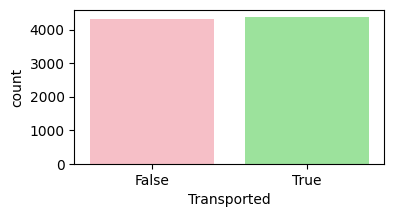

In [57]:
# Ratio of target variable
print(df_public["Transported"].value_counts())

plt.figure(figsize=(4,2))
colors = ["lightpink", "lightgreen"]  # Define desired colors
sns.countplot(df_public, x="Transported", hue="Transported", legend=False, palette=colors)

<h4> Investigate the correlation between targeted label and column features:</h><br>

# VIP
- nearly 97.67% are non-VIP
- Neither VIP nor not, their target label is evenly distributed

# HomePlanet
- Earth(54%), Europa(25%), Mars(20%)
- Earth - transported	10% less than non-transported
- Europa -> 16.53% is transported while 8.56% is not


# CryoSleep
- CryoSleep == `True`, higher chance to be transported
- CryoSleep == `False`, lower chance to be transported

# Destination
- almost equally distributed

# Spending
- Higher chances to be transported when `spending` is less than 0.5 sd of mean

In [33]:
pd.set_option('display.float_format', '{:.2%}'.format)

# VIP

# df_vip.isnull().sum()
df_public.value_counts(['VIP', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()


proportion
VIP   Transported            
True  True              0.90%
      False             1.45%
False True             49.45%
      False            48.21%

In [122]:
df_public.value_counts(['HomePlanet', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()


proportion
HomePlanet Transported            
Mars       True             10.83%
           False             9.88%
Europa     True             16.53%
           False             8.56%
Earth      True             22.97%
           False            31.22%

In [60]:
df_public.value_counts(['CryoSleep', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()

proportion
CryoSleep Transported            
True      True             29.29%
          False             6.54%
False     True             21.11%
          False            43.06%

In [61]:
df_public.value_counts(['Destination', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()

proportion
Destination   Transported            
TRAPPIST-1e   True             32.75%
              False            36.75%
PSO J318.5-22 True              4.71%
              False             4.64%
55 Cancri e   True             12.90%
              False             8.25%

# Handling Numeric Data

<Axes: ylabel='Density'>

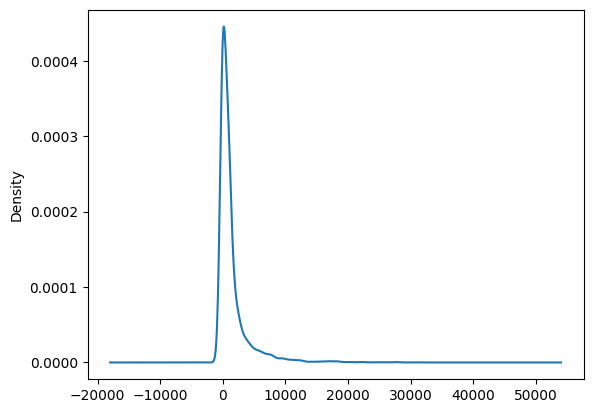

In [62]:
df_public['Total_spending'].plot(kind='kde')

<Axes: ylabel='Frequency'>

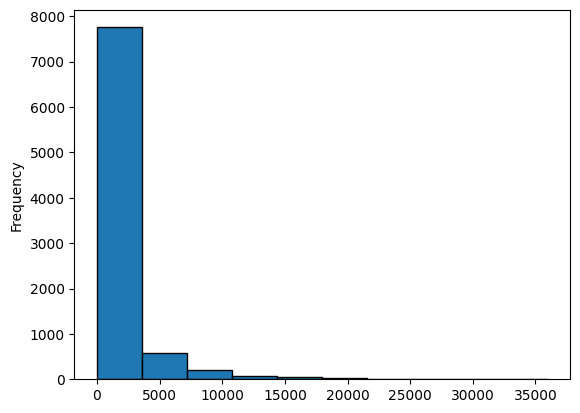

In [64]:
df_public['Total_spending'].plot(kind='hist', edgecolor='black')

Total_spending:
	Mean:	 1440.8663292304152
	sd:	 2803.045693772285


In [34]:
# Calculate the thresholds for categorization
# thresholds = [
#     mean_value - 2 * std_value, 
#     mean_value - std_value, 
#     mean_value, 
#     mean_value + std_value, 
#     mean_value + 2 * std_value
# ]

mean_value = df_public['Total_spending'].mean()
std_value = df_public['Total_spending'].std()

print("Total_spending:")
print("\tMean:\t", mean_value)
print("\tsd:\t", std_value)

thresholds = [
    float('-inf'), 
    mean_value - 1.5 * std_value, 
    mean_value - 0.5 * std_value,
    mean_value + 0.5 * std_value, 
    mean_value + 1.5 * std_value, 
    float('inf')
]


df_public['spending_Category'] = pd.cut(df_public['Total_spending'], bins=thresholds, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df_spCat = df_public.value_counts(['spending_Category', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()
df_spCat.loc[('Very Low', True), 'proportion'] = 0
df_spCat.loc[('Very Low', False), 'proportion'] = 0

df_spCat


Total_spending:
	Mean:	 1440.8663292304152
	sd:	 2803.045693772285


proportion
spending_Category Transported            
Very High         True              1.92%
                  False             4.29%
High              True              2.57%
                  False             4.60%
Medium            True             12.78%
                  False            31.66%
Low               True             33.10%
                  False             9.09%
Very Low          True              0.00%
                  False             0.00%

In [85]:
thresholds = [
    float('-inf'), 
    mean_value - 0.5 * std_value,
    mean_value + 0.5 * std_value, 
    float('inf')
]

# pd.reset_option('^display.', silent=True)
pd.set_option('display.float_format', '{:.2%}'.format)

df_public['spending_Category02'] = pd.cut(df_public['Total_spending'], bins=thresholds, labels=['Low', 'Medium', 'High'])
df_public.value_counts(['spending_Category02', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()



proportion
spending_Category02 Transported            
High                True              4.49%
                    False             8.89%
Medium              True             12.78%
                    False            31.66%
Low                 True             33.10%
                    False             9.09%

In [80]:
df_public.value_counts(['spending_Category02', 'Transported']).sort_index(ascending=False).to_frame()


count
spending_Category02 Transported       
High                True           390
                    False          773
Medium              True          1111
                    False         2752
Low                 True          2877
                    False          790

Cabin

In [87]:
df_public.value_counts(['Cabin_deck', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()


proportion
Cabin_deck Transported            
T          True              0.01%
           False             0.05%
G          True             15.55%
           False            14.57%
F          True             14.47%
           False            18.42%
E          True              3.68%
           False             6.63%
D          True              2.44%
           False             3.19%
C          True              5.98%
           False             2.81%
B          True              6.73%
           False             2.44%
A          True              1.50%
           False             1.52%

In [90]:
df_public.value_counts(['Cabin_num', 'Transported'], normalize=True).sort_values(ascending=False).to_frame()

,,proportion
Cabin_num,Transported,
82,True,0.20%
230,True,0.18%
56,True,0.18%
50,True,0.16%
133,True,0.16%
...,...,...
877,False,0.01%
1296,True,0.01%
706,False,0.01%


In [91]:
df_public.value_counts(['Cabin_side', 'Transported'], normalize=True).sort_index(ascending=False).to_frame()

proportion
Cabin_side Transported            
S          True             28.02%
           False            22.46%
P          True             22.35%
           False            27.17%

In [88]:
df_public

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_num,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_spending,Name,Transported,spending_Category,spending_Category02
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,3900.00%,False,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,Maham Ofracculy,False,Low,Low
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,2400.00%,False,10900.00%,900.00%,2500.00%,54900.00%,4400.00%,73600.00%,Juanna Vines,True,Medium,Medium
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,5800.00%,True,4300.00%,357600.00%,0.00%,671500.00%,4900.00%,1038300.00%,Altark Susent,False,Very High,High
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,3300.00%,False,0.00%,128300.00%,37100.00%,332900.00%,19300.00%,517600.00%,Solam Susent,False,High,High
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,1600.00%,False,30300.00%,7000.00%,15100.00%,56500.00%,200.00%,109100.00%,Willy Santantines,True,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,4100.00%,True,0.00%,681900.00%,0.00%,164300.00%,7400.00%,853600.00%,Gravior Noxnuther,False,Very High,High
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,1800.00%,False,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,Kurta Mondalley,False,Low,Low
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,2600.00%,False,0.00%,0.00%,187200.00%,100.00%,0.00%,187300.00%,Fayey Connon,True,Medium,Medium
8691,9280_01,Europa,False,E,608,S,55 Cancri e,3200.00%,False,0.00%,104900.00%,0.00%,35300.00%,323500.00%,463700.00%,Celeon Hontichre,False,High,High


Export result

In [115]:
df_Data = df_public[
    [   'PassengerId', 'HomePlanet', 'CryoSleep',
        'Cabin_deck', 'Cabin_side', 
        'Age',
        'spending_Category02',
        'Transported'
    ]
]
df_Data = df_Data.rename(columns = {'spending_Category02':'Spending'})
df_Data

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_side,Age,Spending,Transported
0,0001_01,Europa,False,B,P,3900.00%,Low,False
1,0002_01,Earth,False,F,S,2400.00%,Medium,True
2,0003_01,Europa,False,A,S,5800.00%,High,False
3,0003_02,Europa,False,A,S,3300.00%,High,False
4,0004_01,Earth,False,F,S,1600.00%,Medium,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,P,4100.00%,High,False
8689,9278_01,Earth,True,G,S,1800.00%,Low,False
8690,9279_01,Earth,False,G,S,2600.00%,Medium,True
8691,9280_01,Europa,False,E,S,3200.00%,High,False


In [116]:
# Check number of null values
df_Data.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin_deck     199
Cabin_side     199
Age            179
Spending         0
Transported      0
dtype: int64

In [104]:
df_export01 = df_Data
fillNA(df_export01)

file_name = '../../preprocess_train_dataset/analy_01.csv'
df_export01.to_csv(file_name, sep=',', encoding='utf-8', index=False)

In [106]:
df_export01.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep        0
Cabin_deck     199
Cabin_side     199
Age              0
Spending         0
Transported      0
dtype: int64

In [117]:
df_Data.value_counts(['Spending', 'CryoSleep'], normalize=True).sort_values(ascending=False).to_frame()

,,proportion
Spending,CryoSleep,
Medium,False,44.50%
Low,True,35.83%
High,False,13.39%
Low,False,6.28%


Handle missing data of `CryoSleep` by `Spending`

In [118]:
mapping = {
    'High': False,
    'Medium': False,
    'Low': True
}

# Fill the missing values in 'sleep' column based on 'categ' labels
df_Data['CryoSleep'] = df_Data.apply(lambda row: mapping[row['Spending']] if pd.isna(row['CryoSleep']) else row['CryoSleep'], axis=1)

In [119]:
df_Data.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep        0
Cabin_deck     199
Cabin_side     199
Age            179
Spending         0
Transported      0
dtype: int64

In [120]:
df_Data.value_counts(['HomePlanet', 'Spending'], normalize=True).sort_values(ascending=False).to_frame()

proportion
HomePlanet Spending            
Earth      Medium        32.64%
           Low           20.54%
Europa     Low           12.03%
           High          11.07%
Mars       Medium         9.74%
           Low            9.57%
Europa     Medium         1.99%
Mars       High           1.40%
Earth      High           1.01%

In [124]:
df_Data.value_counts(['Cabin_deck', 'Transported'], normalize=True).sort_index(ascending=True).to_frame()

proportion
Cabin_deck Transported            
A          False             1.52%
           True              1.50%
B          False             2.44%
           True              6.73%
C          False             2.81%
           True              5.98%
D          False             3.19%
           True              2.44%
E          False             6.63%
           True              3.68%
F          False            18.42%
           True             14.47%
G          False            14.57%
           True             15.55%
T          False             0.05%
           True              0.01%